# Sentiment analysis of description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

In [2]:
# importing data
data = pd.read_csv('../../Data/winedata-v1.1.csv')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,wordCount,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"{""aromas"": 1, ""include"": 1, ""tropical"": 1, ""fr...",0.000,0.935,0.065,0.1531
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"{""this"": 1, ""is"": 2, ""ripe"": 1, ""and"": 2, ""fru...",0.000,0.868,0.132,0.6486
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"{""tart"": 1, ""and"": 2, ""snappy"": 1, ""the"": 3, ""...",0.053,0.947,0.000,-0.1280
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"{""pineapple"": 1, ""rind"": 1, ""lemon"": 1, ""pith""...",0.000,0.926,0.074,0.3400
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"{""much"": 1, ""like"": 1, ""the"": 1, ""regular"": 1,...",0.000,0.805,0.195,0.8176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),"{""notes"": 1, ""of"": 3, ""honeysuckle"": 1, ""and"":...",0.000,0.834,0.166,0.7331
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,"{""citation"": 1, ""is"": 2, ""given"": 1, ""as"": 2, ...",0.000,0.914,0.086,0.5267
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,"{""well-drained"": 1, ""gravel"": 1, ""soil"": 1, ""g...",0.072,0.865,0.063,0.1548
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,"{""a"": 2, ""dry"": 1, ""style"": 1, ""of"": 2, ""pinot...",0.000,0.891,0.109,0.5267


In [11]:
sentiment = data[['points','price','sentiment_neg','sentiment_neu','sentiment_pos','sentiment_compound']]
sentiment.describe()

,points,price,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
count,129971.000000,120975.000000,129971.000000,129971.000000,129971.000000,129971.000000
mean,88.447138,35.363389,0.015289,0.848386,0.136325,0.513542
std,3.039730,41.022218,0.032282,0.093915,0.094311,0.372575
min,80.000000,4.000000,0.000000,0.381000,0.000000,-0.928800
25%,86.000000,17.000000,0.000000,0.786000,0.067000,0.284600
50%,88.000000,25.000000,0.000000,0.854000,0.129000,0.624900
75%,91.000000,42.000000,0.000000,0.917000,0.199000,0.817600
max,100.000000,3300.000000,0.509000,1.000000,0.619000,0.993700


<AxesSubplot:>

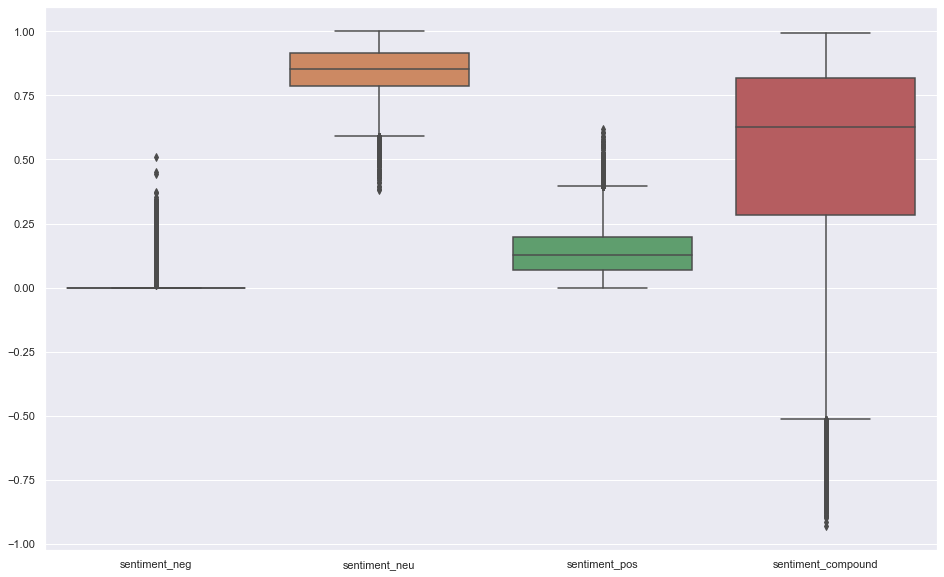

In [4]:
# plotting distribution of sentiment analysis

plt.figure(figsize=(16,10))
sns.boxplot(data=sentiment[['sentiment_neg','sentiment_neu','sentiment_pos','sentiment_compound']])

<AxesSubplot:xlabel='sentiment_neg', ylabel='points'>

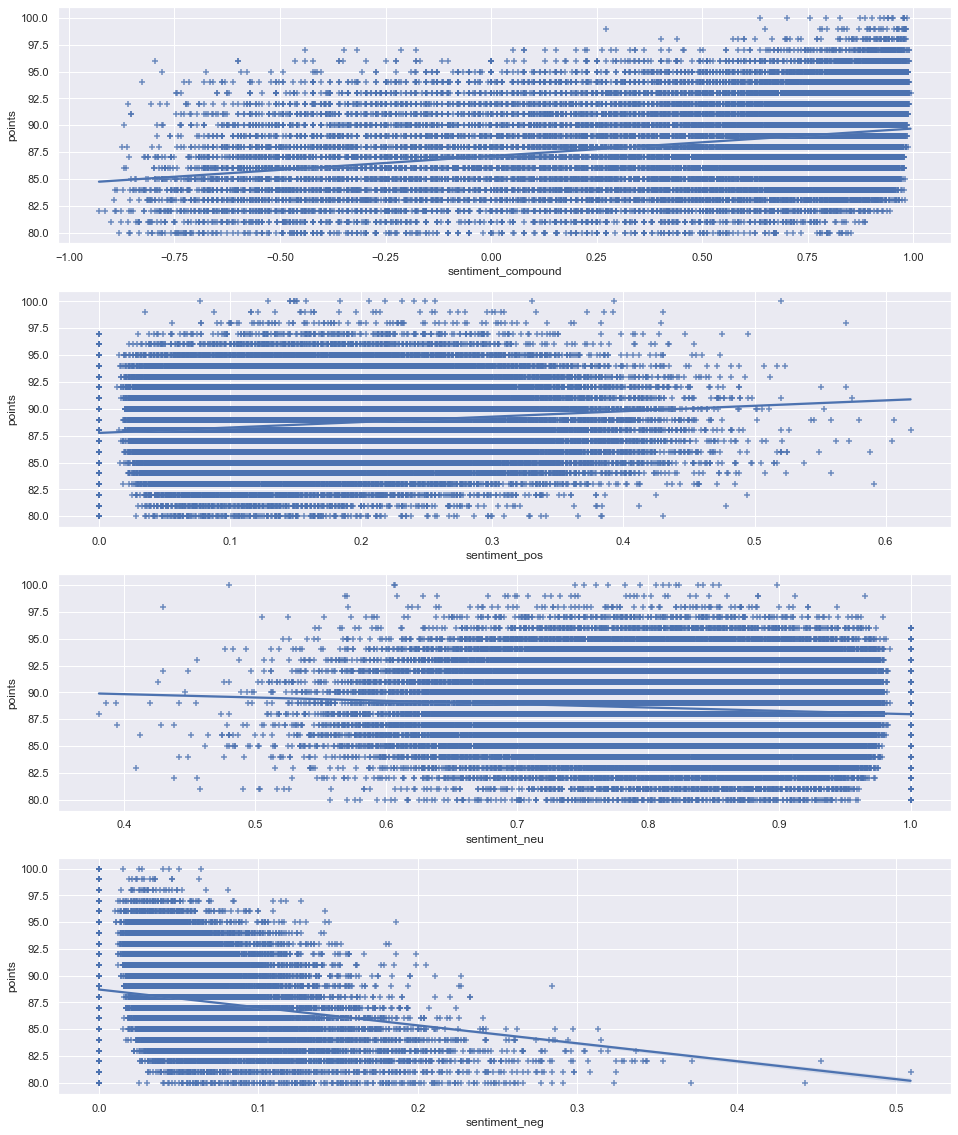

In [10]:
# plotting regression of compound sentiment and points

fig2, ax2 = plt.subplots(4, figsize=(16,20))
sns.regplot(ax=ax2[0], data=sentiment, x='sentiment_compound', y='points', marker="+")
sns.regplot(ax=ax2[1], data=sentiment, x='sentiment_pos', y='points', marker="+")
sns.regplot(ax=ax2[2], data=sentiment, x='sentiment_neu', y='points', marker="+")
sns.regplot(ax=ax2[3], data=sentiment, x='sentiment_neg', y='points', marker="+")

<AxesSubplot:>

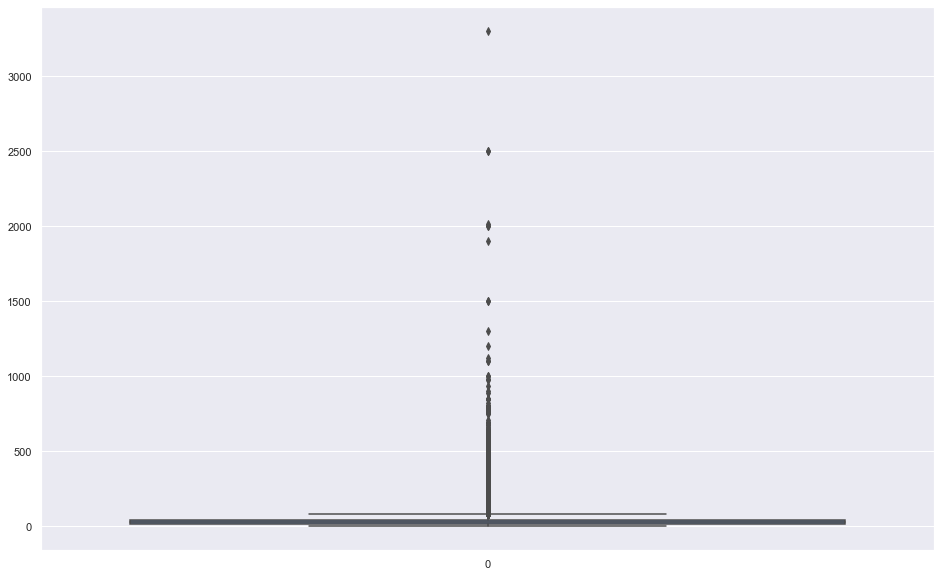

In [12]:
# plotting distribution of sentiment analysis

plt.figure(figsize=(16,10))
sns.boxplot(data=sentiment['price'])

<AxesSubplot:xlabel='sentiment_neg', ylabel='price'>

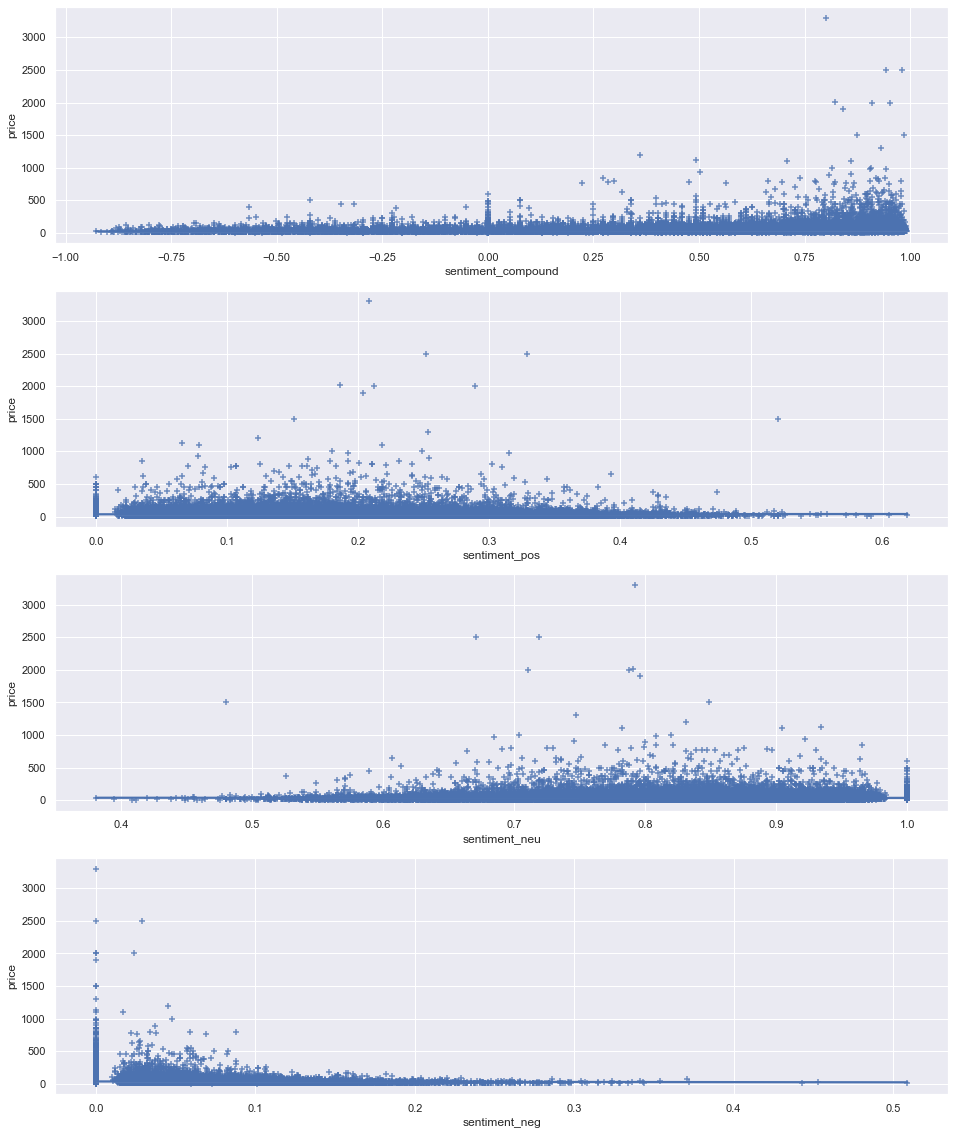

In [13]:
# plotting regression of compound sentiment and price

fig3, ax3 = plt.subplots(4, figsize=(16,20))
sns.regplot(ax=ax3[0], data=sentiment, x='sentiment_compound', y='price', marker="+")
sns.regplot(ax=ax3[1], data=sentiment, x='sentiment_pos', y='price', marker="+")
sns.regplot(ax=ax3[2], data=sentiment, x='sentiment_neu', y='price', marker="+")
sns.regplot(ax=ax3[3], data=sentiment, x='sentiment_neg', y='price', marker="+")

<AxesSubplot:xlabel='sentiment_compound', ylabel='price'>

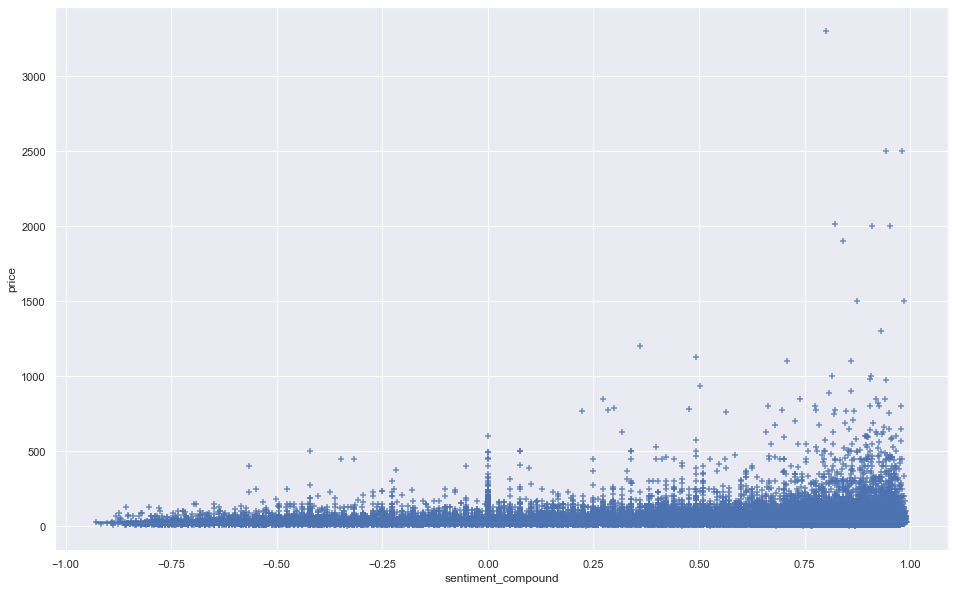

In [21]:
plt.figure(figsize=(16,10))
sns.regplot(data=sentiment, x='sentiment_compound', y='price', marker="+")